<a href="https://colab.research.google.com/github/ethan-huffington/Ethan-Nikolai/blob/master/Timm_Library_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<font color = 'moccasin'>`NB SETUP`

Notebook Taken From:
- https://gist.github.com/Chris-hughes10/a9e5ec2cd7e7736c651bf89b5484b4a9
- Great model export resources still in the above source.

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 5.1 MB/s 


In [ ]:
import torch
import timm

###<font color = 'moccasin'>`DATASET DOWNLOADS`

####<font color = 'salmon'>`Oxford-IIT PET DATASET`

- 37 Pet Categories
- ~200 Records/Category
- 7,349 Total Records

In [ ]:
# Download files from URL
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz -P pets

--2022-08-03 13:07:48--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2022-08-03 13:07:48--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘pets/images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  31.6MB/s    in 25s     

2022-08-03 13:08:14 (30.1 MB/s) - ‘pets/images.tar.gz’ saved [791918971/791918971]



In [ ]:
# Unzip tar.gz files:
# zxf means: gunzip (the 'z' letter) and extract (the 'x' letter) from file (the 'f' letter, and the file name follows).
!tar zxf pets/images.tar.gz -C pets

In [ ]:
# Print files (limit output to 10)
!ls pets/images | head -n 5

Abyssinian_100.jpg
Abyssinian_100.mat
Abyssinian_101.jpg
Abyssinian_101.mat
Abyssinian_102.jpg


####<font color = 'salmon'>`IMAGINETTE DATASET`

- 10 Classes of random objects
- ?? Records
- 320 x 320 images

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz -P imagenette

--2022-08-03 13:08:22--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.87.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.87.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341663724 (326M) [application/x-tar]
Saving to: ‘imagenette/imagenette2-320.tgz’

imagenette2-320.tgz 100%[===================>] 325.83M  43.1MB/s    in 7.5s    

2022-08-03 13:08:30 (43.6 MB/s) - ‘imagenette/imagenette2-320.tgz’ saved [341663724/341663724]



In [ ]:
# Unzip tar.gz files:
# zxf means: gunzip (the 'z' letter) and extract (the 'x' letter) from file (the 'f' letter, and the file name follows).
!tar zxf imagenette/imagenette2-320.tgz -C imagenette

In [ ]:
# *** Don't undersstand this step ****
!gzip -d imagenette/imagenette2-320.tgz

In [ ]:
# List 'imagenette' directory files
!ls imagenette 

imagenette2-320  imagenette2-320.tar


####<font color = 'salmon'>`OXFORD IIT FILE PATHS`

In [ ]:
from pathlib import Path

In [ ]:
# Create path object pointing to Oxford IIT dataset location
pets_path = Path('pets/images')
# Create list grabbing from iterating over 
pets_image_paths = list(pets_path.iterdir())

###<font color = 'moccasin'>`TIMM PRE-TRAINED MODEL LIBRARY`

In [ ]:
# List pre-trained models available within timm llibrary (show length)
len(timm.list_models(pretrained=True))

716

Model Summary Page:
https://paperswithcode.com/lib/timm

Tutorial used a tried and true ResNet model

In [ ]:
# List all available resnet models:
timm.list_models('resnet*', pretrained=True)

###<font color = 'moccasin'>`ResNet50D Architecture`
- 'ResNet': Residual Network (Skip Connections)
- '50': 50 Layers
- 'D': A bunch of non-architectural imrovements/optimizations researchers added to the model (iteration 'D') 
- https://arxiv.org/pdf/1812.01187v2.pdf
---
- Trained On: ImageNet
- Crop Pct: 0.875
- Image Size: 224 x 224
- Interpolation: Bicubic

In [ ]:
# Instantiate Pre-Trained Model
model = timm.create_model('resnet50d', pretrained=True)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to /root/.cache/torch/hub/checkpoints/resnet50d_ra2-464e36ba.pth


In [ ]:
# Get architecture details
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Co

In [ ]:
# Get model configuration details:
model.default_cfg

{'architecture': 'resnet50d',
 'classifier': 'fc',
 'crop_pct': 0.875,
 'first_conv': 'conv1.0',
 'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'std': (0.229, 0.224, 0.225),
 'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth'}

In [ ]:
# Inspect Model Classification Head 'fc':
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
# Doing same as above without having to know the model head's name:
model.get_classifier()

Linear(in_features=2048, out_features=1000, bias=True)

####<font color = 'salmon'>`Chop Off Model Head`

In [ ]:
# ***Might be useful for getting emebeddings later
# Set the output layer to have 0 classes, making the final layer an identity function that mirrors the penultimate layer
timm.create_model('resnet50d', pretrained=True, num_classes=0).get_classifier()

Identity()

###<font color = 'moccasin'>`Pooling Options`

In [ ]:
# Inspect current pooling parameters
model.global_pool

SelectAdaptivePool2d (pool_type=avg, flatten=Flatten(start_dim=1, end_dim=-1))

Here, we can see that this returns an instance of SelectAdaptivePool2d, which is a custom layer provided by timm, which supports different pooling and flattening configurations. At the time of writing, the supported pooling options are:

- avg: Average pooling
- max: Max pooling
- avgmax: the sum of average and max pooling, re-scaled by 0.5
- catavgmax: a concatenation of the outputs of average and max pooling along feature dimension. Note that this will double the feature dimension.
- ' ' : No pooling is used, the pooling layer is replaced by an Identity operation
We can visualise the output shapes of the different pooling options as demonstrated below

In [ ]:
# List of pooling type arguments
pool_types = ['avg', 'max', 'avgmax', 'catavgmax', '']

# Cycle pooling type arguments and print 
for pool in pool_types:
    model = timm.create_model('resnet50d', pretrained=True, num_classes=0, global_pool=pool)
    model.eval()
    feature_output = model(torch.randn(1, 3, 224, 224))
    print(feature_output.shape)

torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 4096])
torch.Size([1, 2048, 7, 7])


###<font color = 'moccasin'>`MODIFYING/CUSTOMIZING PRE-TRAINED MODEL`

####<font color = 'salmon'>`POOLING & OUTPUT FEATURES`

We can also modify the classifier and pooling layers of an existing model, using the `reset_classifier` method:

In [ ]:
m = timm.create_model('resnet50d', pretrained=True)

print(f'Original pooling: {m.global_pool}')
print(f'Original classifier: {m.get_classifier()}')
print('--------------------')

# Reduce output features to 10 and switch pooling method to max
m.reset_classifier(10, 'max')

print(f'Modified pooling: {m.global_pool}')
print(f'Modified classifier: {m.get_classifier()}')

Original pooling: SelectAdaptivePool2d (pool_type=avg, flatten=Flatten(start_dim=1, end_dim=-1))
Original classifier: Linear(in_features=2048, out_features=1000, bias=True)
--------------------
Modified pooling: SelectAdaptivePool2d (pool_type=max, flatten=Flatten(start_dim=1, end_dim=-1))
Modified classifier: Linear(in_features=2048, out_features=10, bias=True)


####<font color = 'salmon'>`REPLACE w/ CUSTOM CLASSIFICATION HEAD`

Cat-Avg-Max Pooling:
- *I think: Produces both a max pool and mean pool & concatenates them together, doubling the feature dimension.

In [ ]:
# Modify model: 1) Reduce output features 2) change global pool method (for a richer pre-classification input layer)
model = timm.create_model('resnet50d', pretrained=True, num_classes=10, global_pool='catavgmax')

In [ ]:
from torch import nn

In [ ]:
# Double-Checking the number of Class-head input features has changed
num_in_features = model.get_classifier().in_features; num_in_features

4096

In [ ]:
# Re-Set model head 'fc' with layer specified in PyTorch
model.fc = nn.Sequential(
    nn.BatchNorm1d(num_in_features),
    nn.Linear(in_features=num_in_features, out_features=512, bias=False),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(in_features=512, out_features=10, bias=False))

In [ ]:
# Checking to make sure the new head still outputs 10 Classes
model.eval()
model(torch.randn(1, 3, 224, 224)).shape

torch.Size([1, 10])

###<font color = 'moccasin'>`FEATURE EXTRACTION`

####<font color = 'salmon'>`IMAGE HANDLING`

In [ ]:
# PIL: 'Python Image Library'
from PIL import Image
import numpy as np

In [ ]:
# Grab 2nd image from path list & open with .open() method
image = Image.open(pets_image_paths[1])

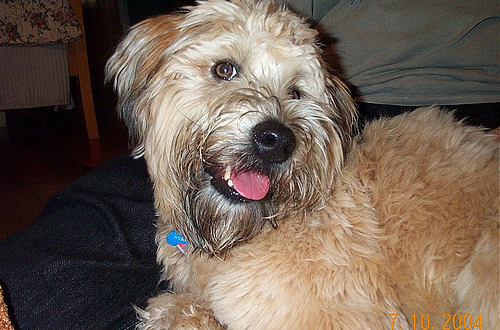

In [ ]:
image

In [ ]:
# Example Data Formatting:
# 1 - Transform image file into tensor
# 2 - Transpose into form Pytorch expects
image = torch.as_tensor(np.array(image, dtype=np.float32)).transpose(2, 0)[None]

####<font color = 'salmon'>`RE-INSTANTIATE RESNET50D`

In [ ]:
model = timm.create_model('resnet50d', pretrained=True)

In [ ]:
# Get Config Parameters:
model.default_cfg

{'architecture': 'resnet50d',
 'classifier': 'fc',
 'crop_pct': 0.875,
 'first_conv': 'conv1.0',
 'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'std': (0.229, 0.224, 0.225),
 'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth'}

If we are only interested in the final feature map - that is the output of the final convolutional layer prior to pooling in this case - we can use the forward_features method to bypass the global pooling and classification layers.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Get Embeddings (bypass final pooling and classification layers)
feature_output = model.forward_features(image)

####<font color = 'salmon'>`EMBEDDING VISUALIZATION`

In [ ]:
# PLOTTING EMBEDDINGS
# 1 - Pull [0] Record embedding matrix 
# 2 - Undo the Matrix Transpose done for PyTorch image preparation
# 3 - .sum(-1).detach() *** Not sure
# 4 - Transform to numpy floats or something

def visualise_feature_output(t):
    plt.imshow(feature_output[0].transpose(0, 2).sum(-1).detach().numpy())
    plt.show()

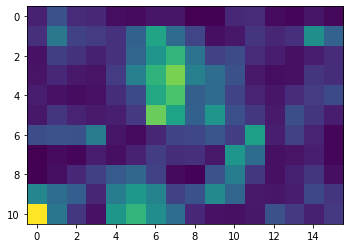

In [ ]:
visualise_feature_output(feature_output)

####<font color = 'salmon'>`PULL FEATURES FROM INTERMEDIATE LAYERS`

Whilst the forward features method can be convenient for retrieving the final feature map, timm also provides functionality which enables us to use models as feature backbones that output feature maps for selected levels.

We can specify that we would like to use a model as a feature backbone by using the argument features_only=True when creating a model. By default, 5 strides will be output from most models (not all have that many), with the first starting at 2 (some start at 1 or 4).

The indices of the feature levels, and number of strides can be modified using the out_indices and output_stride arguments, as demonstrated in the docs

In [ ]:
# Instantiate Model with features_only=True
model = timm.create_model('resnet50d', pretrained=True, features_only=True)

In [ ]:
# Module Names **Need to better define
model.feature_info.module_name()

['act1', 'layer1', 'layer2', 'layer3', 'layer4']

In [ ]:
#  **Need to better define
model.feature_info.reduction()

[2, 4, 8, 16, 32]

In [ ]:
# ** Need to better define
model.feature_info.channels()

[64, 256, 512, 1024, 2048]

In [ ]:
# Send (prepared) image through model
out = model(image)

We should get 5 output 'feature maps' from the five broad sections of the model.

In [ ]:
len(out)

5

In [ ]:
# Print shape of extracted feature maps
# [Batch Size, Num Kernels, Width px, Height px]
for o in out:
    print(o.shape)

torch.Size([1, 64, 250, 165])
torch.Size([1, 256, 125, 83])
torch.Size([1, 512, 63, 42])
torch.Size([1, 1024, 32, 21])
torch.Size([1, 2048, 16, 11])


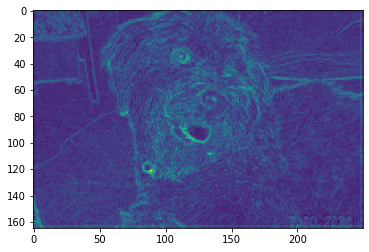

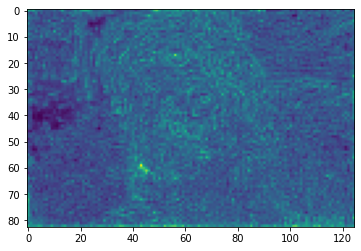

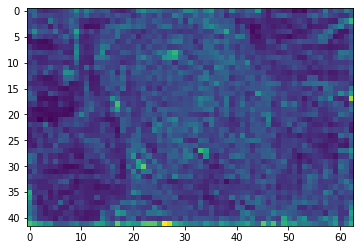

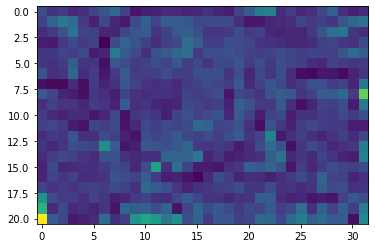

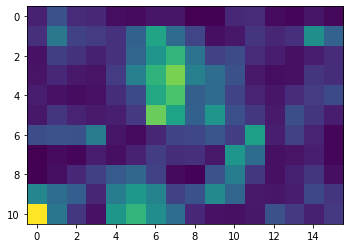

In [ ]:
for o in out:
    plt.imshow(o[0].transpose(0, 2).sum(-1).detach().numpy())
    plt.show()

Each feature map becomes progressively down-sampled with every deeper layer of extraction, however the number of feature maps goes up. 

###<font color = 'moccasin'>`USING TorchVision FX Library (For Further Output Control & Intermediate Layer Access)`

This library allows further control over which node in the model you pull features from - It lets you access every single step in the network.

In [ ]:
# Import Modules
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

In [ ]:
# Instantiate model, with 'exportable=True' to grab transformation(node) names
model = timm.create_model('resnet50d', pretrained=True, exportable=True)

In [ ]:
# Get node names
nodes, _ = get_graph_node_names(model)

In [ ]:
# Display symbolic name of every node step in the model
nodes

In [ ]:
# Syntax for 'Give me the output features for node 'layer1.0.act2'
features = {'layer1.0.act2': 'out'}

In [ ]:
# Truncate the model 'cutting off' every node past 'layer1.0.act2'
feature_extractor = create_feature_extractor(model, return_nodes=features)

In [ ]:
# Inspect the new truncated model
feature_extractor

ResNet(
  (conv1): Module(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64,

In [ ]:
# Send an image through
out = feature_extractor(image)

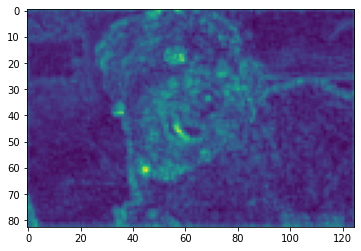

In [ ]:
# Plot the outputted feature map (The model no longer classifies, just spits out feature maps at this node)
plt.imshow(out['out'][0].transpose(0, 2).sum(-1).detach().numpy())

###<font color = 'moccasin'>`DATA AUGMENTATION`

In [ ]:
from PIL import Image

In [ ]:
from timm.data.transforms_factory import create_transform 

In [ ]:
# Create_transform(224)
# - initiates a center crop transform (center crop size 224x224)
# - Convert Image into tensor
# - Standardizes image pixel values

create_transform(224)

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [ ]:
# Create_transform(224):
# - initiates a center crop transform (center crop size 224x224)
# - Convert Image into tensor
# - Standardizes image pixel values

# 'is_training=True' Argument:
# - resizing
# - vertical & horizontal flip
# - color jitter 

create_transform(224, is_training=True)

Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    RandomHorizontalFlip(p=0.5)
    ColorJitter(brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=None)
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [ ]:
image = Image.open(pets_image_paths[0])

In [ ]:
from timm.data.transforms import RandomResizedCropAndInterpolation

tfm = RandomResizedCropAndInterpolation(size=350, interpolation='random')

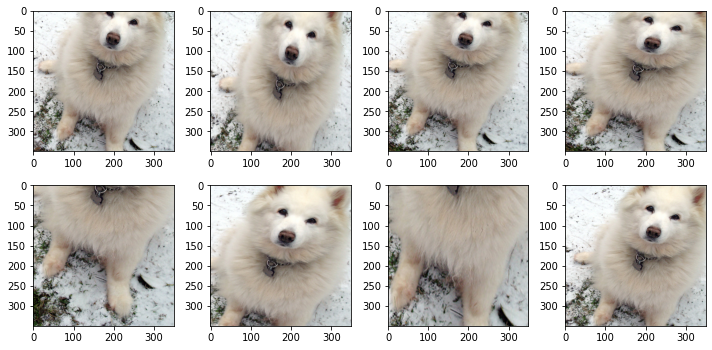

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[0, idx].imshow(im)
    
for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[1, idx].imshow(im)

fig.tight_layout()
plt.show()

###<font color = 'moccasin'>`RANDAUGMENT`

RandAugment is a handy multi-transform operation whose parameters you can specify by dash (-) separated strings. 

In timm, we define the parameters of our RandAugment policy by using a config string; which consists of multiple sections separated by dashes (-).

The first section defines the specific variant of rand augment (currently only rand is supported). The remaining sections, which can be placed in any order, are:

- m (integer): the magnitude of rand augment
- n (integer): the number of transform ops selected per image, this is optional with default = 2
- mstd (float): the standard deviation of the magnitude noise applied
- mmax (integer): sets the upper bound for magnitude to something other than the default of 10
- w (integer): the probability weight index (index of a set of weights to influence the choice of operation)
inc (bool - {0, 1}): use augmentations that increase in severity with magnitude, this is optional with default = 0

For example:

'rand-m9-n3-mstd0.5': results in RandAugment with magnitude 9, 3 augmentations per image, magnitude_std 0.5
'rand-mstd1-w0': results in magnitude_std 1.0, weights 0, default magnitude m of 10, and 2 augmentations per image
Passing a config string to create_transform, we can see that this is handled by the RandAugment object, and we can see the names of all available ops:

In [ ]:
# Create transformer object with auto_augment preset
create_transform(224, is_training=True, auto_augment='rand-m9-mstd0.5')

Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    RandomHorizontalFlip(p=0.5)
    RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Equalize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Invert, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Rotate, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Posterize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Solarize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Color, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Contrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Brightness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Sharpness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearX, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearY, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0.5))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.

In [ ]:
from timm.data.auto_augment import rand_augment_transform

In [ ]:
# Instantiate rand_augment object with additional hyperparameter arguments
tfm = rand_augment_transform(
    config_str='rand-m9-mstd0.5', 
    hparams={'img_mean': (124, 116, 104)}
)

In [ ]:
tfm

RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Equalize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Invert, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Rotate, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Posterize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Solarize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Color, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Contrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Brightness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Sharpness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearX, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearY, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0.5))

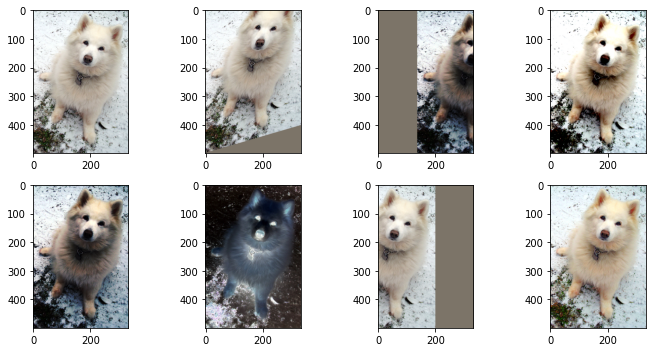

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[0, idx].imshow(im)
    
for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[1, idx].imshow(im)

fig.tight_layout()
plt.show()

###<font color = 'moccasin'>`CutMix & Mixup Augmentations`

###<font color = 'moccasin'>`TITLE`

###<font color = 'moccasin'>`TITLE`

###<font color = 'moccasin'>`TITLE`